# Final Project - Machine Learning 2024/25

### Supervised Learning algorithms - Predicting heart disease

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [2]:
# read preprocessed data
data_10Missings = pd.read_csv("data/balanced_dataset_10_missing.csv")
data_20Missings = pd.read_csv("data/balanced_dataset_20_missing.csv")
#data_10Missings = data_10Missings.sample(10000)
#data_20Missings = data_20Missings.sample(10000)


In [3]:
# split data into train and test subsets
train, test = train_test_split(data_10Missings, test_size = 0.3, train_size=0.7, random_state= 13)

# handle NA values 10 pc
train = train.dropna()
# handle NA values 10 pc
test = test.dropna()

# separate the predictors and the criterion variable
trainDataWithoutCrit = train.drop('Heart_Disease', axis=1)  
trainCrit = train['Heart_Disease']       

testDataWithoutCrit = test.drop('Heart_Disease', axis=1)  
testCrit = test['Heart_Disease']  

# Decision Tree

In [4]:
# decision tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(trainDataWithoutCrit, trainCrit)
# get accuracy score
print(f"train data accuracy: {model.score(trainDataWithoutCrit, trainCrit).round(2)}")
print(f"test data accuracy: {model.score(testDataWithoutCrit, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.53


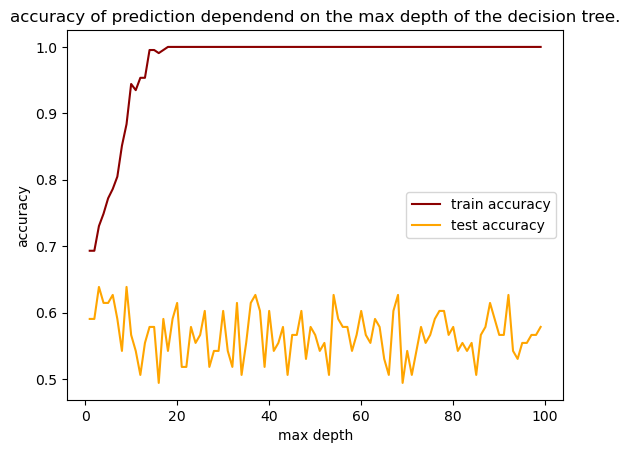

In [5]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

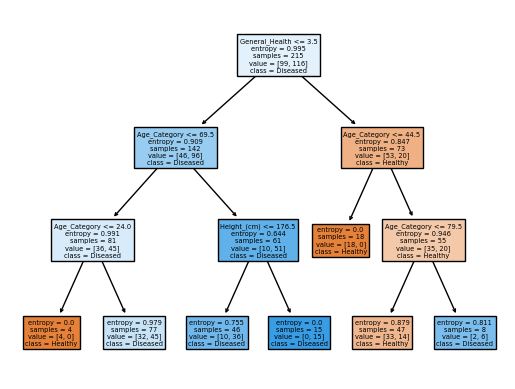

In [6]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
plt.show()

bestAccuracyTrees10 = model.score(testDataWithoutCrit, testCrit)

0.6385542168674698
0.6385542168674698
0.6362433862433863
0.6369605405749985
0.6428571428571429
0.6385542168674698
0.6210340775558167
0.6385542168674698
0.782608695652174


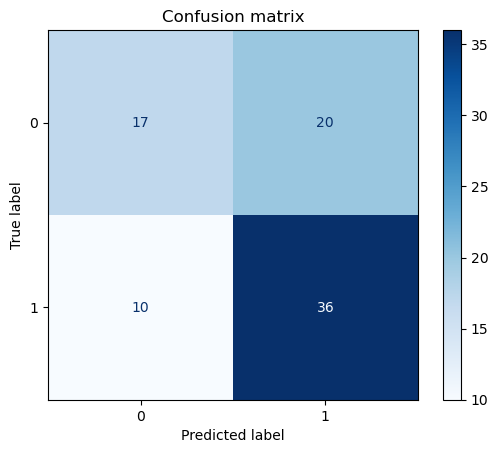

In [7]:
y_true = testCrit
y_pred_test = model.predict(testDataWithoutCrit)
bestAccuracyTrees10 = model.score(testDataWithoutCrit, testCrit)
print(bestAccuracyTrees10)
print(precision_score(y_true, y_pred_test, average='micro'))
print(precision_score(y_true, y_pred_test, average='macro'))
print(precision_score(y_true, y_pred_test, average='weighted'))

precisionTrees10 = precision_score(y_true, y_pred_test, average='binary')
print(precisionTrees10)
recallTrees10 = recall_score(testCrit, y_pred_test, average='binary')
print(recall_score(y_true, y_pred_test, average='micro'))
print(recall_score(y_true, y_pred_test, average='macro'))
print(recall_score(y_true, y_pred_test, average='weighted'))
F1Trees10 = f1_score(testCrit, y_pred_test, average='binary')

print(recallTrees10)

cm = confusion_matrix(y_true, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

# Multi-layer perceptron

In [8]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [9]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=13,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


train data accuracy: 0.8
test data accuracy: 0.78


/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


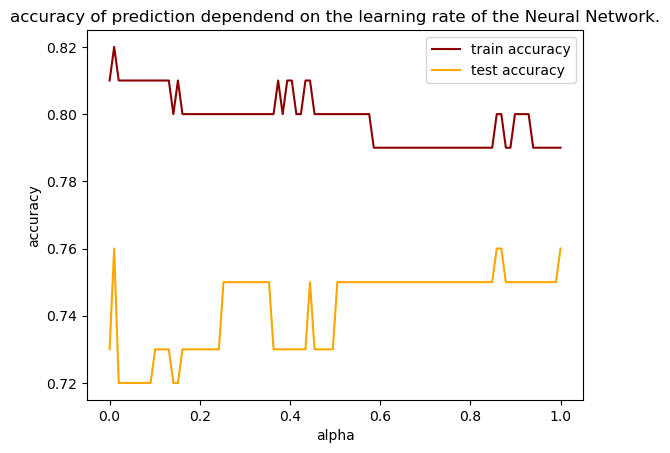

In [10]:
allTrainAccuracies = []
allTestAccuracies = []
alphas = np.linspace(1e-10, 1, 100)
for alpha in alphas:
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alpha,
                    hidden_layer_sizes=(10, 10), 
                    random_state=12,
                    max_iter=1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(alphas, allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(alphas, allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the learning rate of the Neural Network.")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-learning-rate.svg', format='svg')
plt.show()


bestPerformingAlpha = allTestAccuracies.index(max(allTestAccuracies)) 

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anac

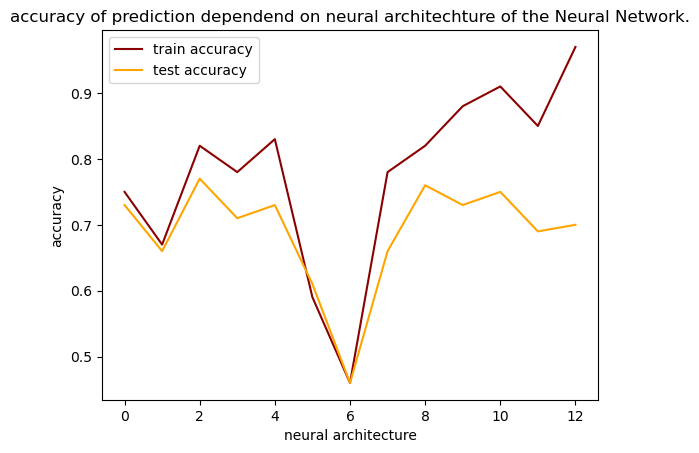

5

In [11]:
allTrainAccuracies = []
allTestAccuracies = []
hiddenLayerConfigs = [(1), (2), (5), (10), (50), (1, 1), (2, 2), (5, 5), (10, 10), (50, 50), (50, 25), (10, 10, 10), (100, 50, 25)]

for i in range(len(hiddenLayerConfigs)):
    layerConfig = hiddenLayerConfigs[i]
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= layerConfig, 
                    random_state= 12,
                    max_iter= 1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(range(len(hiddenLayerConfigs)), allTrainAccuracies, c = "darkred", label = "train accuracy")

plt.plot(range(len(hiddenLayerConfigs)), allTestAccuracies, c = "orange", label = "test accuracy")

plt.title("accuracy of prediction dependend on neural architechture of the Neural Network.")
plt.xlabel("neural architecture")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-architecture.svg', format='svg')
plt.show()


bestPerformingLayerConfig = allTestAccuracies.index(max(allTestAccuracies)) 
hiddenLayerConfigs[bestPerformingLayerConfig]

train data accuracy: 0.76
test data accuracy: 0.72


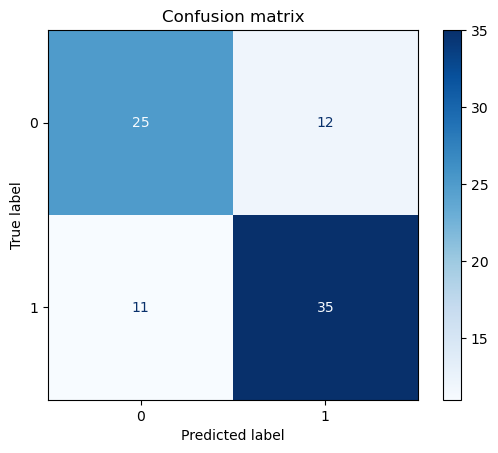

In [12]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= hiddenLayerConfigs[bestPerformingLayerConfig], 
                    random_state=9,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


y_pred_test = clf.predict(X_test)
bestAccuracyNeuralNetworks10 = clf.score(X_test, testCrit)
precisionNeuralNetworks10 = precision_score(testCrit, y_pred_test, average='binary')
recallNeuralNetworks10 = recall_score(testCrit, y_pred_test, average='binary')
F1NeuralNetworks10 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

# K-Nearest Neighbours

In [13]:
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
trainDataWithoutCrit = scaler.transform(trainDataWithoutCrit)  
testDataWithoutCrit = scaler.transform(testDataWithoutCrit)

In [14]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.64


### What k would make the best predictions?


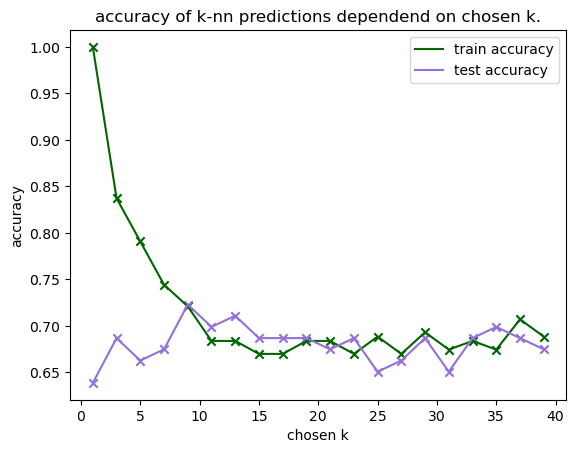

9


In [15]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 40, 2))


for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
    predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

train data accuracy: 0.72
test data accuracy: 0.72


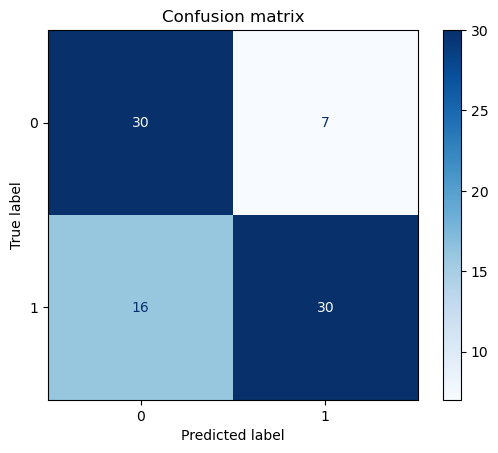

In [16]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


y_pred_test = knnClassifier.predict(testDataWithoutCrit)
bestAccuracyKnn10 = knnClassifier.score(testDataWithoutCrit, testCrit)
precisionKnn10 = precision_score(testCrit, y_pred_test, average='binary')
recallKnn10 = recall_score(testCrit, y_pred_test, average='binary')
F1Knn10 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()



# 20 percent missings

In [17]:
# split data into train and test subsets
train, test = train_test_split(data_20Missings, test_size = 0.3, train_size=0.7, random_state= 13)

# handle NA values 10 pc
train = train.dropna()
# handle NA values 10 pc
test = test.dropna()

# separate the predictors and the criterion variable
trainDataWithoutCrit = train.drop('Heart_Disease', axis=1)  
trainCrit = train['Heart_Disease']       

testDataWithoutCrit = test.drop('Heart_Disease', axis=1)  
testCrit = test['Heart_Disease']  

# Decision Tree


In [18]:
# decision tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(trainDataWithoutCrit, trainCrit)
# get accuracy score
print(f"train data accuracy: {model.score(trainDataWithoutCrit, trainCrit).round(2)}")
print(f"test data accuracy: {model.score(testDataWithoutCrit, testCrit).round(2)}")

train data accuracy: 1.0
test data accuracy: 0.59


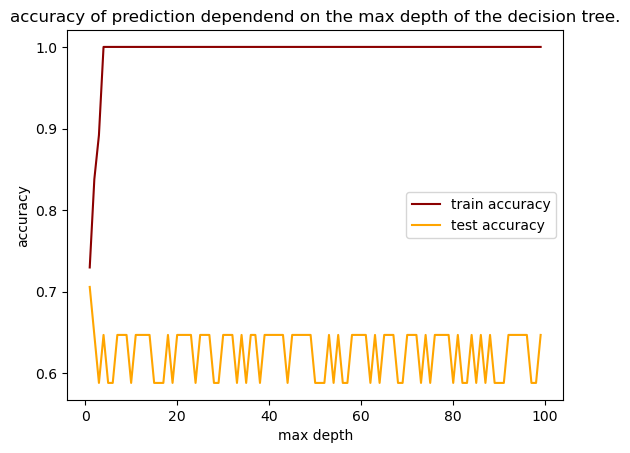

In [19]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

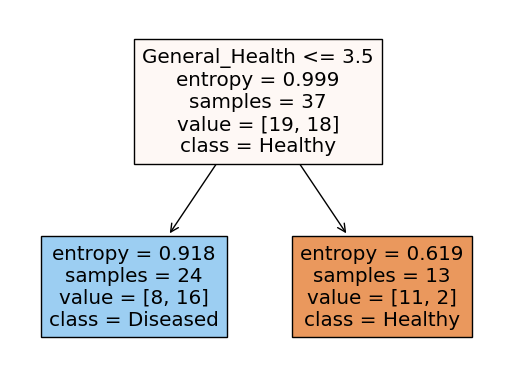

In [20]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
plt.show()

bestAccuracyTrees20 = model.score(testDataWithoutCrit, testCrit)

0.7058823529411765
0.7058823529411765
0.7071428571428571
0.7067226890756303
0.7142857142857143
0.7058823529411765
0.7013888888888888
0.7058823529411765
0.625


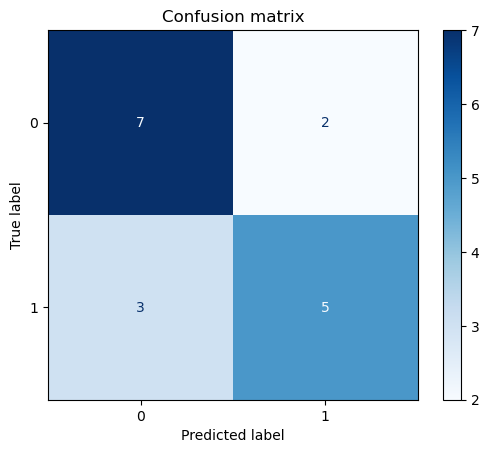

In [21]:
y_true = testCrit
y_pred_test = model.predict(testDataWithoutCrit)
bestAccuracyTrees20 = model.score(testDataWithoutCrit, testCrit)
print(bestAccuracyTrees20)
print(precision_score(y_true, y_pred_test, average='micro'))
print(precision_score(y_true, y_pred_test, average='macro'))
print(precision_score(y_true, y_pred_test, average='weighted'))

precisionTrees20 = precision_score(y_true, y_pred_test, average='binary')
print(precisionTrees20)
recallTrees20 = recall_score(testCrit, y_pred_test, average='binary')
print(recall_score(y_true, y_pred_test, average='micro'))
print(recall_score(y_true, y_pred_test, average='macro'))
print(recall_score(y_true, y_pred_test, average='weighted'))
F1Trees20 = f1_score(testCrit, y_pred_test, average='binary')

print(recallTrees20)

cm = confusion_matrix(y_true, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

# Neural Network

In [22]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [23]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=13,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


train data accuracy: 0.92
test data accuracy: 0.71


/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anac

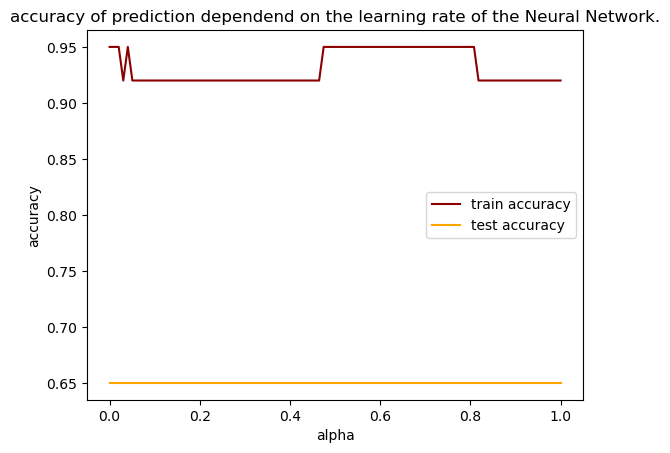

In [24]:
allTrainAccuracies = []
allTestAccuracies = []
alphas = np.linspace(1e-10, 1, 100)
for alpha in alphas:
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alpha,
                    hidden_layer_sizes=(10, 10), 
                    random_state=12,
                    max_iter=1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(alphas, allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(alphas, allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the learning rate of the Neural Network.")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-learning-rate.svg', format='svg')
plt.show()


bestPerformingAlpha = allTestAccuracies.index(max(allTestAccuracies)) 

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anac

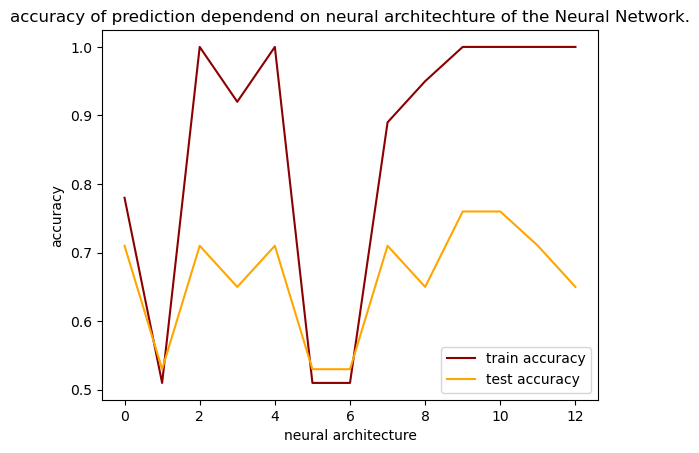

(50, 50)

In [25]:
allTrainAccuracies = []
allTestAccuracies = []
hiddenLayerConfigs = [(1), (2), (5), (10), (50), (1, 1), (2, 2), (5, 5), (10, 10), (50, 50), (50, 25), (10, 10, 10), (100, 50, 25)]

for i in range(len(hiddenLayerConfigs)):
    layerConfig = hiddenLayerConfigs[i]
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= layerConfig, 
                    random_state= 12,
                    max_iter= 1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(range(len(hiddenLayerConfigs)), allTrainAccuracies, c = "darkred", label = "train accuracy")

plt.plot(range(len(hiddenLayerConfigs)), allTestAccuracies, c = "orange", label = "test accuracy")

plt.title("accuracy of prediction dependend on neural architechture of the Neural Network.")
plt.xlabel("neural architecture")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-architecture.svg', format='svg')
plt.show()


bestPerformingLayerConfig = allTestAccuracies.index(max(allTestAccuracies)) 
hiddenLayerConfigs[bestPerformingLayerConfig]

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


train data accuracy: 1.0
test data accuracy: 0.71


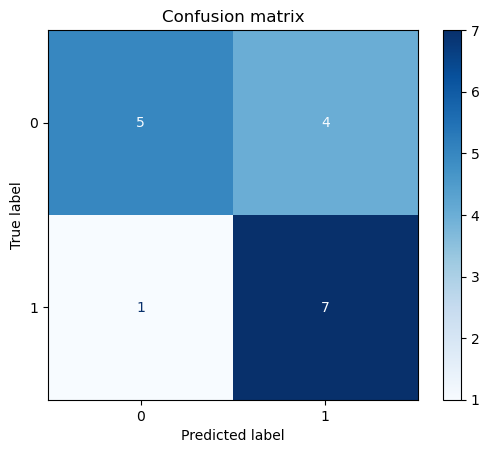

In [26]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= hiddenLayerConfigs[bestPerformingLayerConfig], 
                    random_state=9,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


y_pred_test = clf.predict(X_test)
bestAccuracyNeuralNetworks20 = clf.score(X_test, testCrit)
precisionNeuralNetworks20 = precision_score(testCrit, y_pred_test, average='binary')
recallNeuralNetworks20 = recall_score(testCrit, y_pred_test, average='binary')
F1NeuralNetworks20 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

# K-Nearest Neighbours

In [27]:
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
trainDataWithoutCrit = scaler.transform(trainDataWithoutCrit)  
testDataWithoutCrit = scaler.transform(testDataWithoutCrit)

In [28]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.59


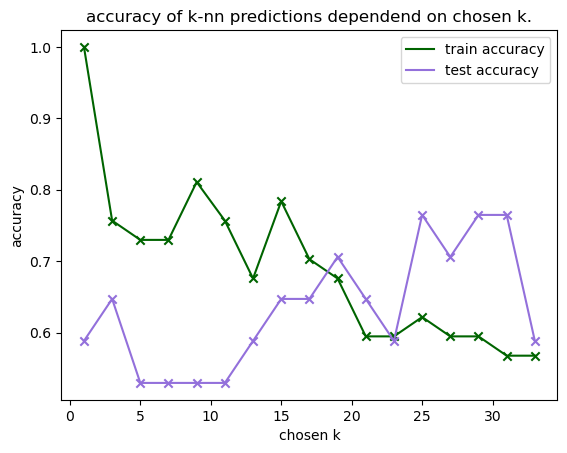

25


In [29]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 35, 2))


for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
    predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

train data accuracy: 0.62
test data accuracy: 0.76


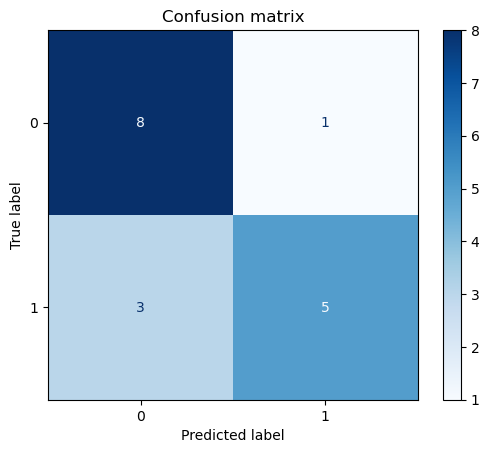

In [30]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


y_pred_test = knnClassifier.predict(testDataWithoutCrit)
bestAccuracyKnn20 = knnClassifier.score(testDataWithoutCrit, testCrit)
precisionKnn20 = precision_score(testCrit, y_pred_test, average='binary')
recallKnn20 = recall_score(testCrit, y_pred_test, average='binary')
F1Knn20 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()



In [31]:
test["Heart_Disease"].value_counts(normalize = True)

Heart_Disease
0    0.529412
1    0.470588
Name: proportion, dtype: float64

# Overall Performances of different supervised learning algorithms with CCA

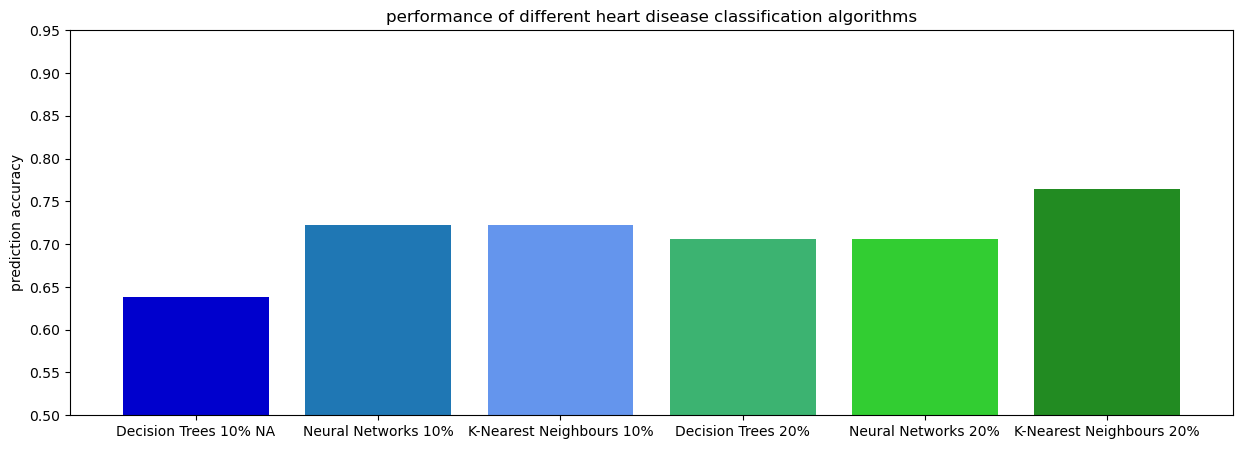

In [32]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [bestAccuracyTrees10, bestAccuracyNeuralNetworks10, bestAccuracyKnn10, bestAccuracyTrees20, bestAccuracyNeuralNetworks20, bestAccuracyKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([0.5, 0.95])
ax.set_ylabel("prediction accuracy")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averagePerformanceCCA = sum(allAccuracies)/len(allAccuracies)

In [33]:
(len(train)+len(test))/2000

0.027

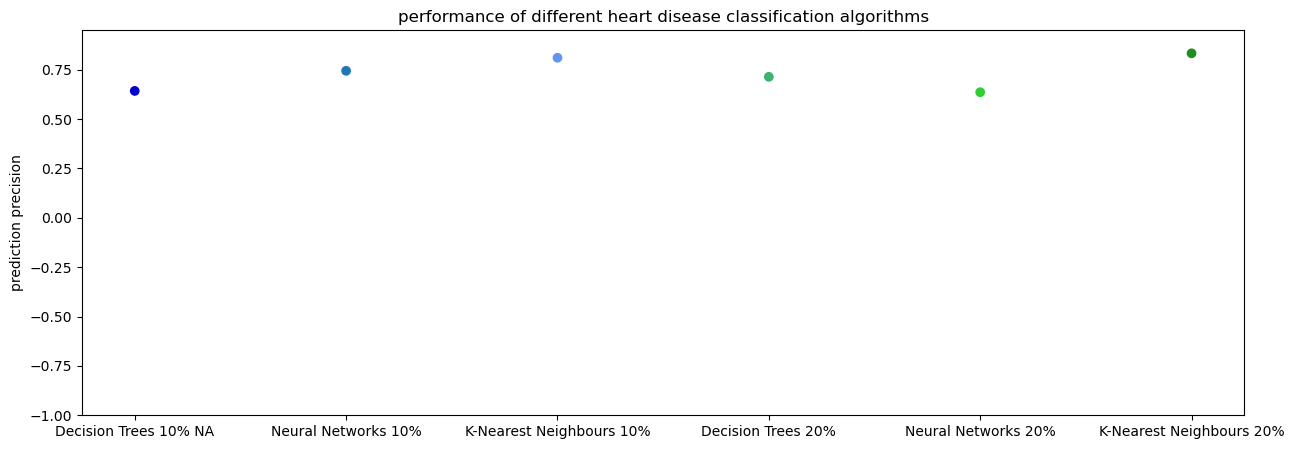

In [34]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [precisionTrees10, precisionNeuralNetworks10, precisionKnn10, precisionTrees20, precisionNeuralNetworks20, precisionKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 0.95])
ax.set_ylabel("prediction precision")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averagePrecisionCCA = sum(allAccuracies)/len(allAccuracies)

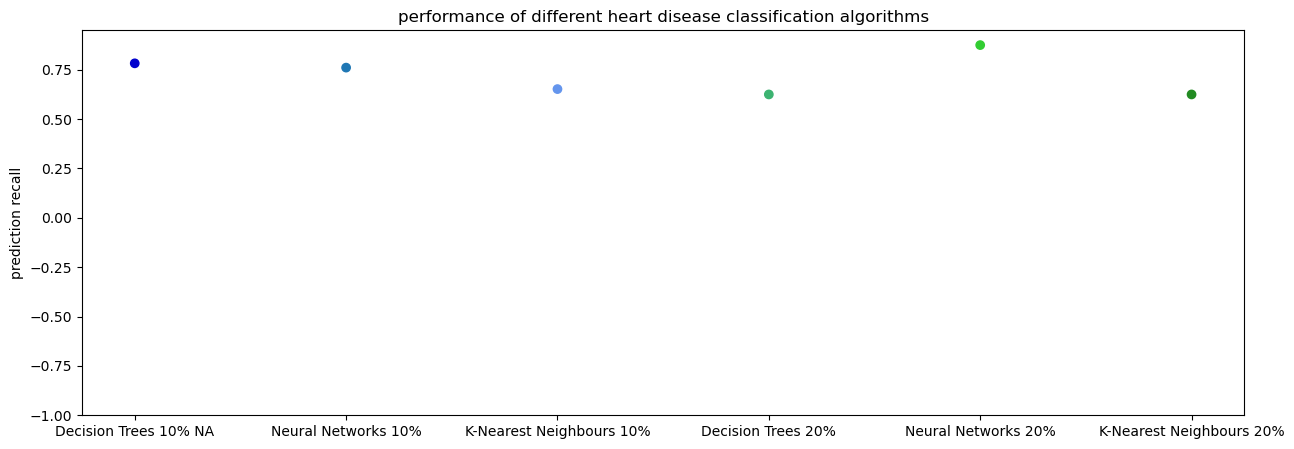

In [35]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [recallTrees10, recallNeuralNetworks10, recallKnn10, recallTrees20, recallNeuralNetworks20, recallKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 0.95])
ax.set_ylabel("prediction recall")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averagerecallCCA = sum(allAccuracies)/len(allAccuracies)

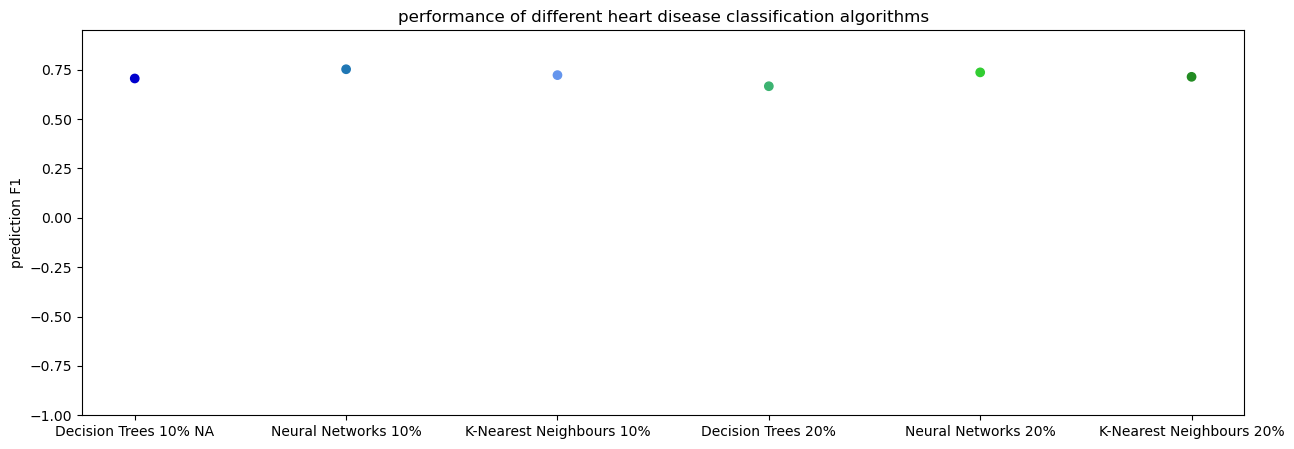

In [36]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [F1Trees10, F1NeuralNetworks10, F1Knn10, F1Trees20, F1NeuralNetworks20, F1Knn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 0.95])
ax.set_ylabel("prediction F1")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averageF1CCA = sum(allAccuracies)/len(allAccuracies)

### What effect does listwise deletion have?

Here we can see, that the performacne of all our learning algorithms is more or less identical to their performance when the dataset had no NAs.
It is identical to the baseline probability of heart disease. So the simple decision rule: "Categorise every case as healthy" would have the same accuracy!

But, the dataset size is reduced horrendously. For 20% the train data set had 216197 cases in the beginning and now only 4842, meaning only 2% are still there. Another disadvantage is that there are many cases in the test dataset that had missings too, those would simply not be classified at all. 

In summary, we are not content with this technique to handle NAs and will now try mean imputation and multiple imputation.

# Mean Imputation

In [37]:
# read preprocessed data
data_10Missings = pd.read_csv("data/balanced_dataset_10_missing.csv")
data_20Missings = pd.read_csv("data/balanced_dataset_20_missing.csv")


In [38]:
# split data into train and test subsets
train, test = train_test_split(data_10Missings, test_size = 0.3, train_size=0.7, random_state= 13)

# mean imputation
train_imputed = train.fillna(train.mean())
test_imputed = test.fillna(test.mean())


# separate the predictors and the criterion variable
trainDataWithoutCrit = train_imputed.drop('Heart_Disease', axis=1)  
trainCrit = train_imputed['Heart_Disease']       

testDataWithoutCrit = test_imputed.drop('Heart_Disease', axis=1)  
testCrit = test_imputed['Heart_Disease']  

### Decision Tree

In [39]:
# decision tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(trainDataWithoutCrit, trainCrit)
# get accuracy score
print(f"train data accuracy: {model.score(trainDataWithoutCrit, trainCrit).round(2)}")
print(f"test data accuracy: {model.score(testDataWithoutCrit, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.64


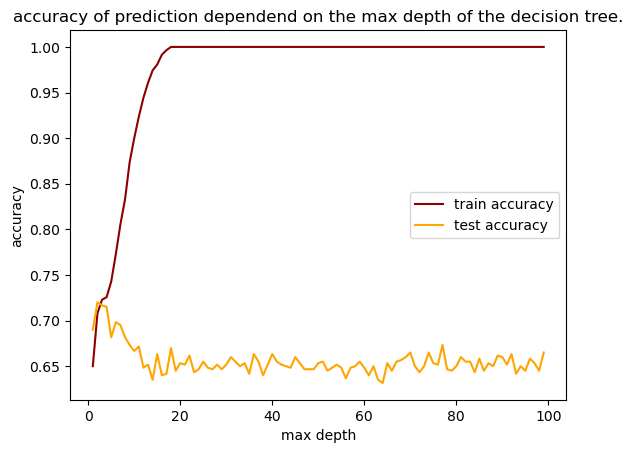

In [40]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

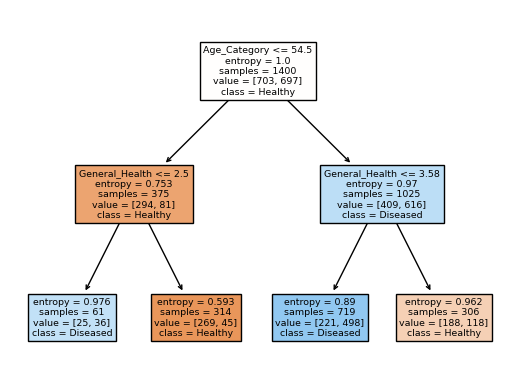

In [41]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
plt.show()

bestAccuracyTrees10 = model.score(testDataWithoutCrit, testCrit)

0.72
0.72
0.7234909815554977
0.7232355438807051
0.6979472140762464
0.72
0.7193386005267193
0.72
0.7854785478547854


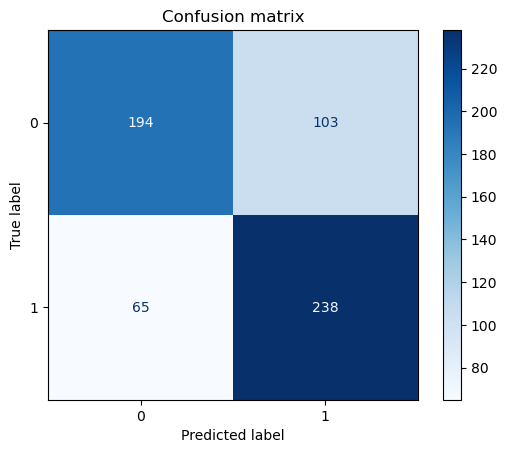

In [42]:
y_true = testCrit
y_pred_test = model.predict(testDataWithoutCrit)
bestAccuracyTrees10 = model.score(testDataWithoutCrit, testCrit)
print(bestAccuracyTrees10)
print(precision_score(y_true, y_pred_test, average='micro'))
print(precision_score(y_true, y_pred_test, average='macro'))
print(precision_score(y_true, y_pred_test, average='weighted'))

precisionTrees10 = precision_score(y_true, y_pred_test, average='binary')
print(precisionTrees10)
recallTrees10 = recall_score(testCrit, y_pred_test, average='binary')
print(recall_score(y_true, y_pred_test, average='micro'))
print(recall_score(y_true, y_pred_test, average='macro'))
print(recall_score(y_true, y_pred_test, average='weighted'))
F1Trees10 = f1_score(testCrit, y_pred_test, average='binary')

print(recallTrees10)

cm = confusion_matrix(y_true, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

# Multi-layer perceptron

In [43]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [44]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=13,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")

bestAccuracyNeuralNetworks10 = clf.score(X_test, testCrit)

train data accuracy: 0.72
test data accuracy: 0.74


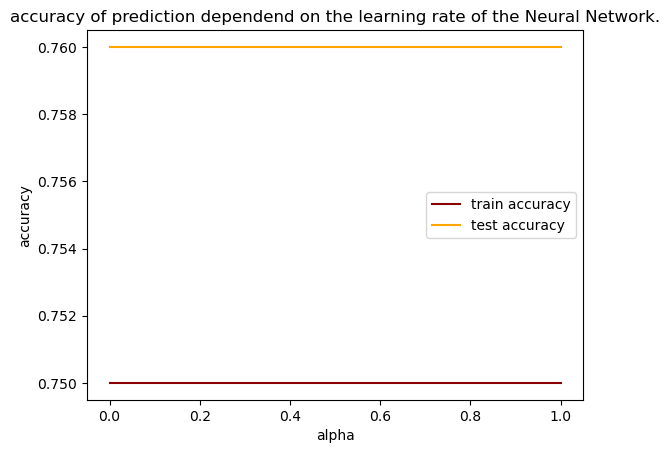

In [45]:
allTrainAccuracies = []
allTestAccuracies = []
alphas = np.linspace(1e-10, 1, 100)
for alpha in alphas:
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alpha,
                    hidden_layer_sizes=(10, 10), 
                    random_state=12,
                    max_iter=1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(alphas, allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(alphas, allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the learning rate of the Neural Network.")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-learning-rate.svg', format='svg')
plt.show()


bestPerformingAlpha = allTestAccuracies.index(max(allTestAccuracies)) 

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


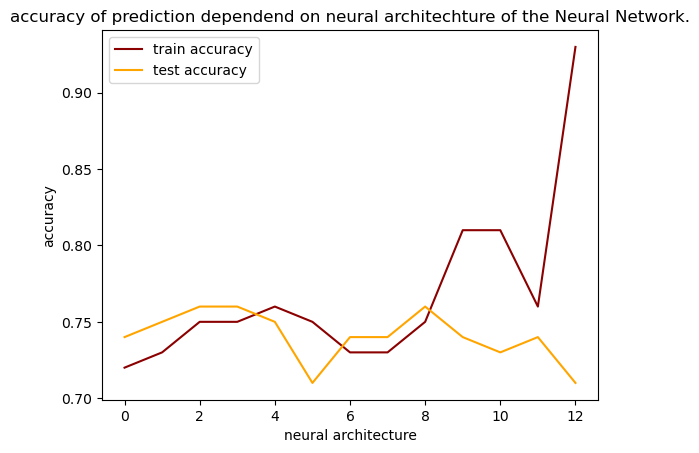

5

In [46]:
allTrainAccuracies = []
allTestAccuracies = []
hiddenLayerConfigs = [(1), (2), (5), (10), (50), (1, 1), (2, 2), (5, 5), (10, 10), (50, 50), (50, 25), (10, 10, 10), (100, 50, 25)]

for i in range(len(hiddenLayerConfigs)):
    layerConfig = hiddenLayerConfigs[i]
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= layerConfig, 
                    random_state= 12,
                    max_iter= 1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(range(len(hiddenLayerConfigs)), allTrainAccuracies, c = "darkred", label = "train accuracy")

plt.plot(range(len(hiddenLayerConfigs)), allTestAccuracies, c = "orange", label = "test accuracy")

plt.title("accuracy of prediction dependend on neural architechture of the Neural Network.")
plt.xlabel("neural architecture")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-architecture.svg', format='svg')
plt.show()


bestPerformingLayerConfig = allTestAccuracies.index(max(allTestAccuracies)) 
hiddenLayerConfigs[bestPerformingLayerConfig]

train data accuracy: 0.74
test data accuracy: 0.76


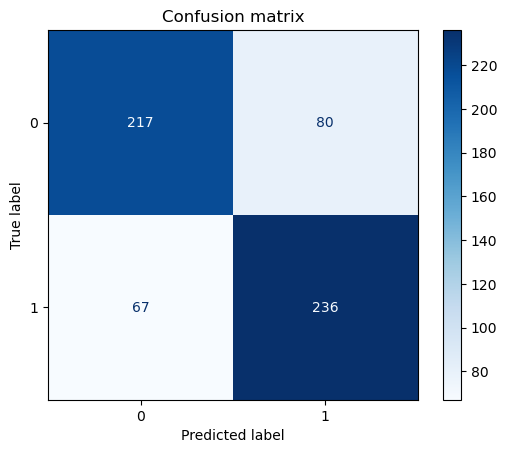

In [47]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= hiddenLayerConfigs[bestPerformingLayerConfig], 
                    random_state=9,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


y_pred_test = clf.predict(X_test)
bestAccuracyNeuralNetworks10 = clf.score(X_test, testCrit)
precisionNeuralNetworks10 = precision_score(testCrit, y_pred_test, average='binary')
recallNeuralNetworks10 = recall_score(testCrit, y_pred_test, average='binary')
F1NeuralNetworks10 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

### K-NN neighbours

In [48]:
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
trainDataWithoutCrit = scaler.transform(trainDataWithoutCrit)  
testDataWithoutCrit = scaler.transform(testDataWithoutCrit)

In [49]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.63


In [50]:
# trainDataWithoutCrit.flags.c_contiguous
# some bug!!

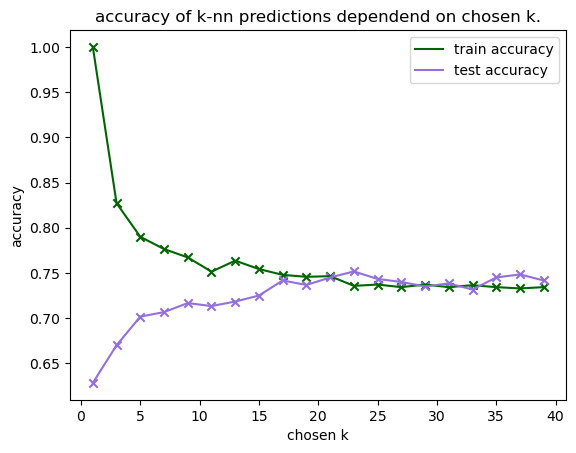

23


In [51]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 40, 2))

for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(np.ascontiguousarray(trainDataWithoutCrit))
    predictionsKnnTest = knnClassifier.predict(np.ascontiguousarray(testDataWithoutCrit))
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

train data accuracy: 0.74
test data accuracy: 0.75


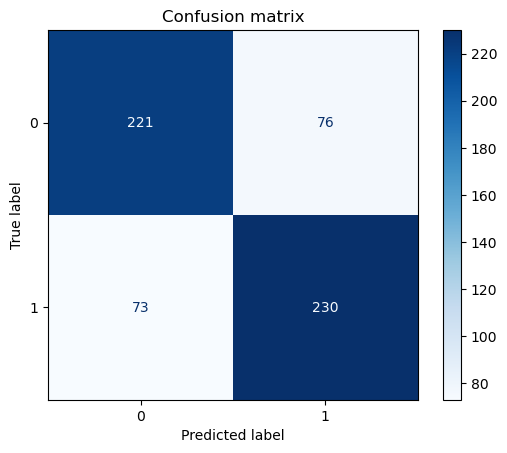

In [52]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


y_pred_test = knnClassifier.predict(testDataWithoutCrit)
bestAccuracyKnn10 = knnClassifier.score(testDataWithoutCrit, testCrit)
precisionKnn10 = precision_score(testCrit, y_pred_test, average='binary')
recallKnn10 = recall_score(testCrit, y_pred_test, average='binary')
F1Knn10 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()



# 20 % missings

In [53]:
# split data into train and test subsets
train, test = train_test_split(data_20Missings, test_size = 0.3, train_size=0.7, random_state= 13)

# mean imputation
train_imputed = train.fillna(train.mean())
test_imputed = test.fillna(test.mean())

# separate the predictors and the criterion variable
trainDataWithoutCrit = train_imputed.drop('Heart_Disease', axis=1)  
trainCrit = train_imputed['Heart_Disease']       

testDataWithoutCrit = test_imputed.drop('Heart_Disease', axis=1)  
testCrit = test_imputed['Heart_Disease']  

### Decision Tree

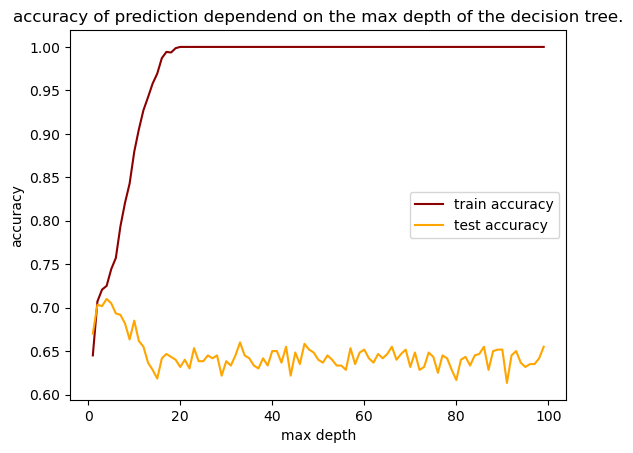

In [54]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

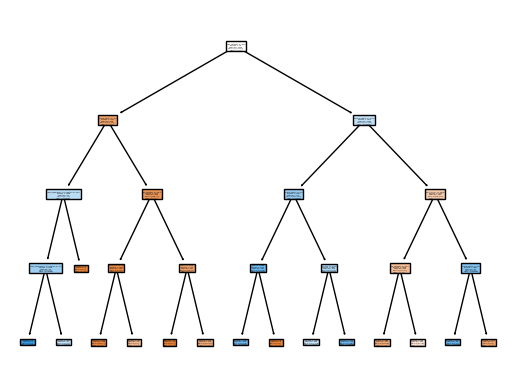

In [55]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
plt.show()

bestAccuracyTrees20 = model.score(testDataWithoutCrit, testCrit)

0.71
0.71
0.7219236810714412
0.7214336667808341
0.6729222520107239
0.71
0.7088042137547088
0.71
0.8283828382838284


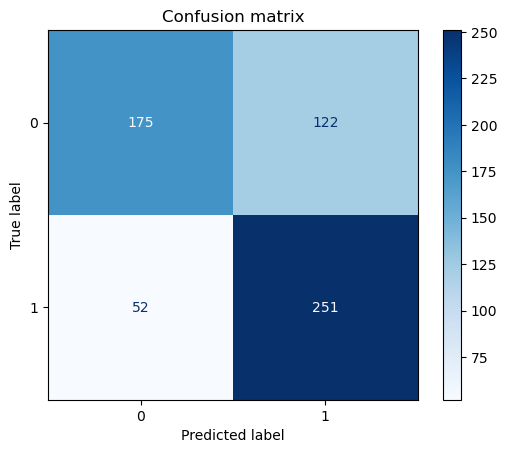

In [56]:
y_true = testCrit
y_pred_test = model.predict(testDataWithoutCrit)
bestAccuracyTrees20 = model.score(testDataWithoutCrit, testCrit)
print(bestAccuracyTrees20)
print(precision_score(y_true, y_pred_test, average='micro'))
print(precision_score(y_true, y_pred_test, average='macro'))
print(precision_score(y_true, y_pred_test, average='weighted'))

precisionTrees20 = precision_score(y_true, y_pred_test, average='binary')
print(precisionTrees20)
recallTrees20 = recall_score(testCrit, y_pred_test, average='binary')
print(recall_score(y_true, y_pred_test, average='micro'))
print(recall_score(y_true, y_pred_test, average='macro'))
print(recall_score(y_true, y_pred_test, average='weighted'))
F1Trees20 = f1_score(testCrit, y_pred_test, average='binary')

print(recallTrees20)

cm = confusion_matrix(y_true, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

### Neural Networks

In [57]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [58]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=13,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")

bestAccuracyNeuralNetworks20 = clf.score(X_test, testCrit)

train data accuracy: 0.73
test data accuracy: 0.72


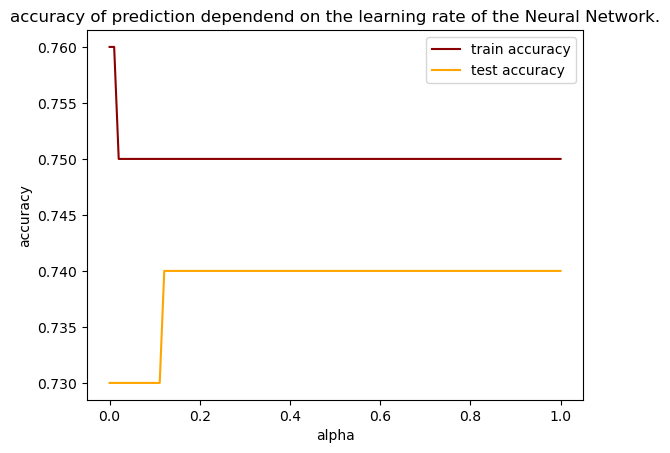

In [59]:
allTrainAccuracies = []
allTestAccuracies = []
alphas = np.linspace(1e-10, 1, 100)
for alpha in alphas:
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alpha,
                    hidden_layer_sizes=(10, 10), 
                    random_state=12,
                    max_iter=1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(alphas, allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(alphas, allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the learning rate of the Neural Network.")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-learning-rate.svg', format='svg')
plt.show()


bestPerformingAlpha = allTestAccuracies.index(max(allTestAccuracies)) 

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


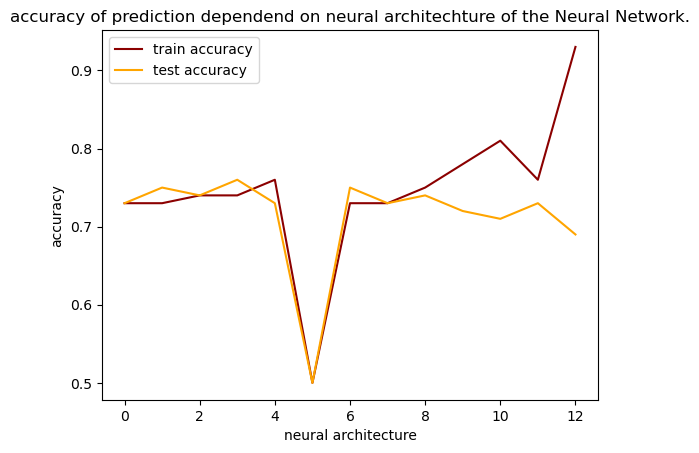

10

In [60]:
allTrainAccuracies = []
allTestAccuracies = []
hiddenLayerConfigs = [(1), (2), (5), (10), (50), (1, 1), (2, 2), (5, 5), (10, 10), (50, 50), (50, 25), (10, 10, 10), (100, 50, 25)]

for i in range(len(hiddenLayerConfigs)):
    layerConfig = hiddenLayerConfigs[i]
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= layerConfig, 
                    random_state= 12,
                    max_iter= 1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(range(len(hiddenLayerConfigs)), allTrainAccuracies, c = "darkred", label = "train accuracy")

plt.plot(range(len(hiddenLayerConfigs)), allTestAccuracies, c = "orange", label = "test accuracy")

plt.title("accuracy of prediction dependend on neural architechture of the Neural Network.")
plt.xlabel("neural architecture")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-architecture.svg', format='svg')
plt.show()


bestPerformingLayerConfig = allTestAccuracies.index(max(allTestAccuracies)) 
hiddenLayerConfigs[bestPerformingLayerConfig]

train data accuracy: 0.73
test data accuracy: 0.74


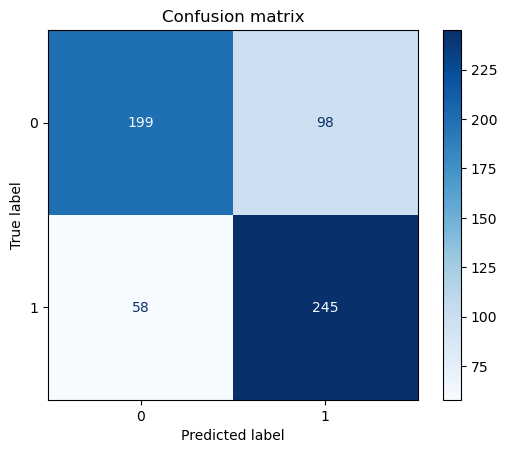

In [61]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= hiddenLayerConfigs[bestPerformingLayerConfig], 
                    random_state=9,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


y_pred_test = clf.predict(X_test)
bestAccuracyNeuralNetworks20 = clf.score(X_test, testCrit)
precisionNeuralNetworks20 = precision_score(testCrit, y_pred_test, average='binary')
recallNeuralNetworks20 = recall_score(testCrit, y_pred_test, average='binary')
F1NeuralNetworks20 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

### K-Nearest Neighbours

In [62]:
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
trainDataWithoutCrit = scaler.transform(trainDataWithoutCrit)  
testDataWithoutCrit = scaler.transform(testDataWithoutCrit)

In [63]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.63


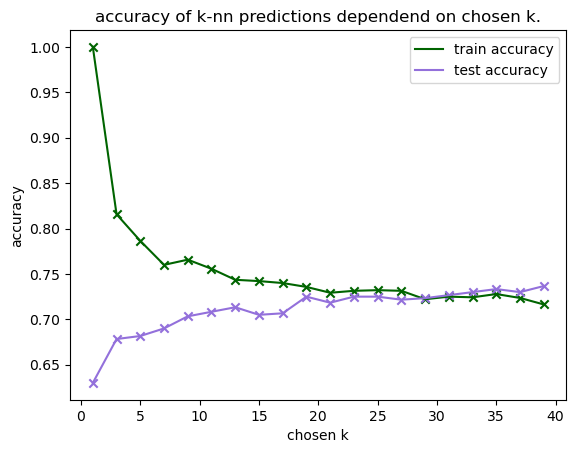

39


In [64]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 40, 2))


for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
    predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

train data accuracy: 0.72
test data accuracy: 0.74


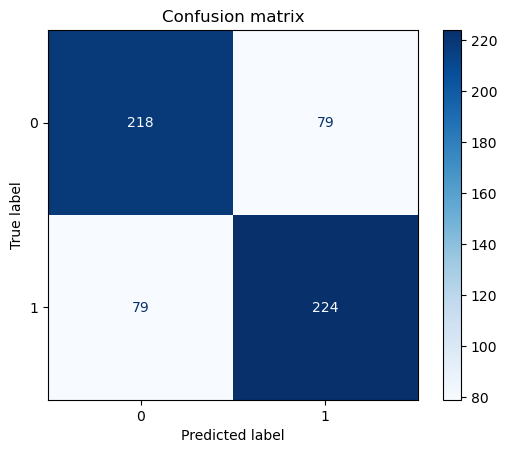

In [65]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


y_pred_test = knnClassifier.predict(testDataWithoutCrit)
bestAccuracyKnn20 = knnClassifier.score(testDataWithoutCrit, testCrit)
precisionKnn20 = precision_score(testCrit, y_pred_test, average='binary')
recallKnn20 = recall_score(testCrit, y_pred_test, average='binary')
F1Knn20 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()



# Compare performances with missings and mean imputation

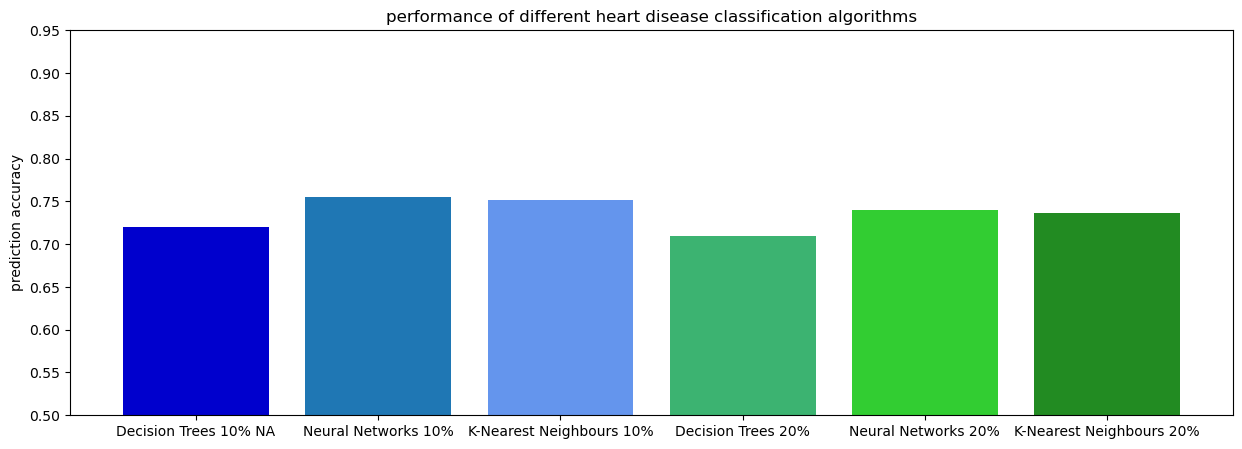

In [66]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [bestAccuracyTrees10, bestAccuracyNeuralNetworks10, bestAccuracyKnn10, bestAccuracyTrees20, bestAccuracyNeuralNetworks20, bestAccuracyKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([0.5, 0.95])
ax.set_ylabel("prediction accuracy")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averagePerformanceMeanImputation = sum(allAccuracies)/len(allAccuracies)

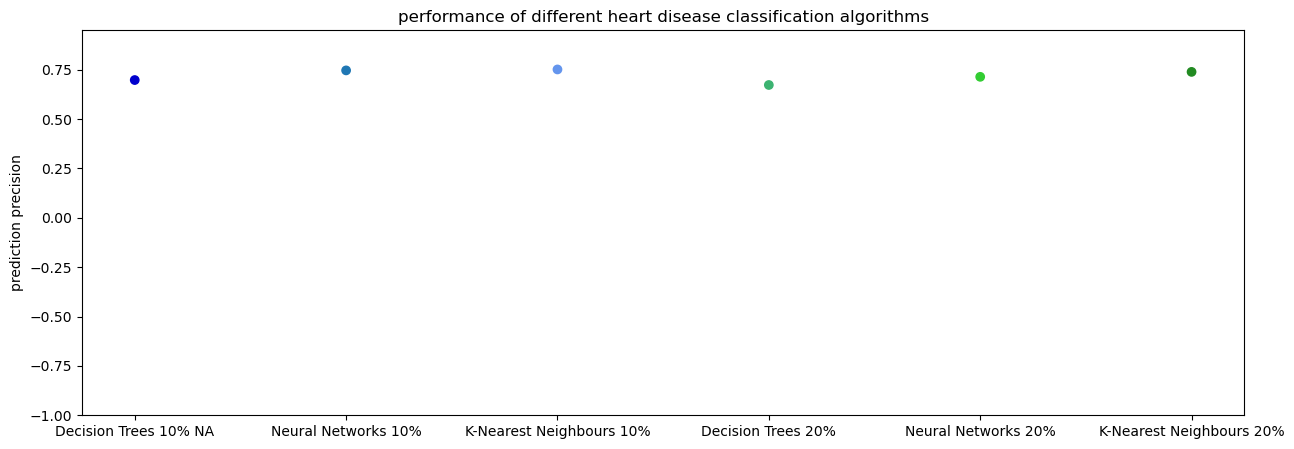

In [67]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [precisionTrees10, precisionNeuralNetworks10, precisionKnn10, precisionTrees20, precisionNeuralNetworks20, precisionKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 0.95])
ax.set_ylabel("prediction precision")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averagePrecisionMeanImputation = sum(allAccuracies)/len(allAccuracies)

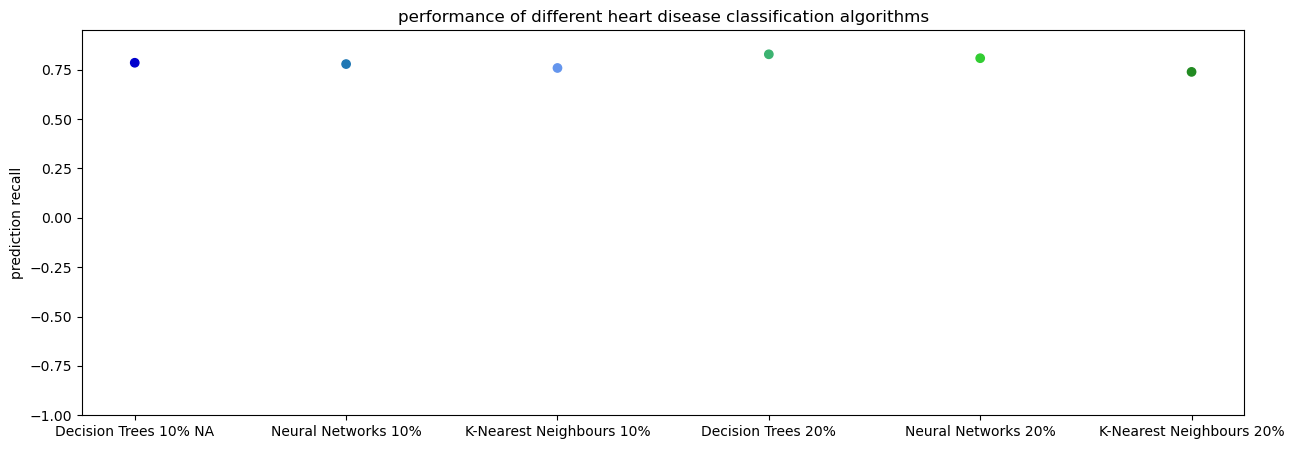

In [68]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [recallTrees10, recallNeuralNetworks10, recallKnn10, recallTrees20, recallNeuralNetworks20, recallKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 0.95])
ax.set_ylabel("prediction recall")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averagerecallMeanImputation = sum(allAccuracies)/len(allAccuracies)

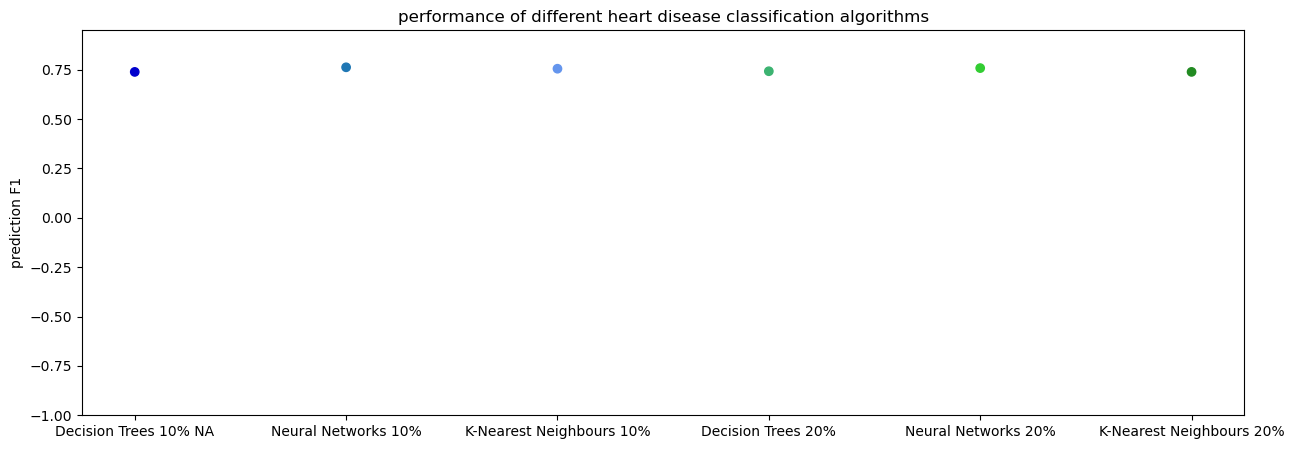

In [69]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [F1Trees10, F1NeuralNetworks10, F1Knn10, F1Trees20, F1NeuralNetworks20, F1Knn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 0.95])
ax.set_ylabel("prediction F1")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averageF1MeanImputation = sum(allAccuracies)/len(allAccuracies)

# Multiple Imputation

In [70]:
# read preprocessed data
data_10Missings = pd.read_csv("data/balanced_dataset_10_missing.csv")
data_20Missings = pd.read_csv("data/balanced_dataset_20_missing.csv")


In [71]:
# split data into train and test subsets
train, test = train_test_split(data_10Missings, test_size = 0.3, train_size=0.7, random_state= 13)

# multiple imputation
imputer = IterativeImputer(random_state=13, max_iter=20) 
train_imputed_array = imputer.fit_transform(train)
test_imputed_array = imputer.transform(test)
train_imputed = pd.DataFrame(train_imputed_array, columns=train.columns, index=train.index)
test_imputed = pd.DataFrame(test_imputed_array, columns=test.columns, index=test.index)


# separate the predictors and the criterion variable
trainDataWithoutCrit = train_imputed.drop('Heart_Disease', axis=1)  
trainCrit = train_imputed['Heart_Disease']       

testDataWithoutCrit = test_imputed.drop('Heart_Disease', axis=1)  
testCrit = test_imputed['Heart_Disease']  

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


### Decision Tree

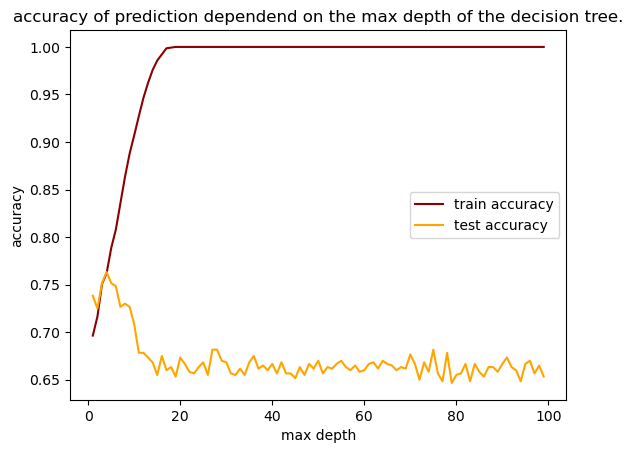

In [72]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

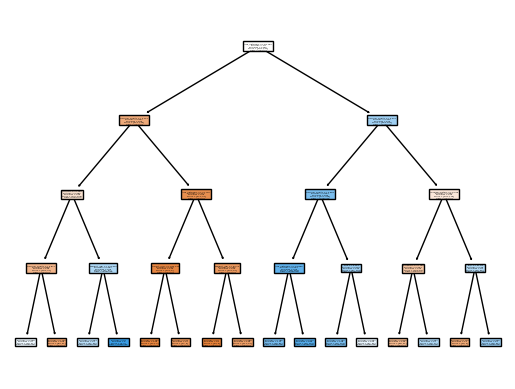

In [73]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
plt.show()

bestAccuracyTrees10 = model.score(testDataWithoutCrit, testCrit)

0.7633333333333333
0.7633333333333333
0.7883478750351816
0.7875232198142416
0.7058823529411765
0.7633333333333333
0.7618428509517619
0.7633333333333333
0.9108910891089109


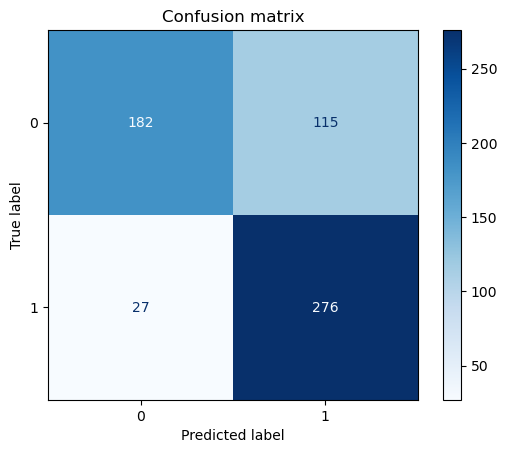

In [74]:
y_true = testCrit
y_pred_test = model.predict(testDataWithoutCrit)
bestAccuracyTrees10 = model.score(testDataWithoutCrit, testCrit)
print(bestAccuracyTrees10)
print(precision_score(y_true, y_pred_test, average='micro'))
print(precision_score(y_true, y_pred_test, average='macro'))
print(precision_score(y_true, y_pred_test, average='weighted'))

precisionTrees10 = precision_score(y_true, y_pred_test, average='binary')
print(precisionTrees10)
recallTrees10 = recall_score(testCrit, y_pred_test, average='binary')
print(recall_score(y_true, y_pred_test, average='micro'))
print(recall_score(y_true, y_pred_test, average='macro'))
print(recall_score(y_true, y_pred_test, average='weighted'))
F1Trees10 = f1_score(testCrit, y_pred_test, average='binary')

print(recallTrees10)

cm = confusion_matrix(y_true, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

### Multilayer Perceptron

In [75]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [76]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=13,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")

bestAccuracyNeuralNetworks10 = clf.score(X_test, testCrit)

train data accuracy: 0.75
test data accuracy: 0.76


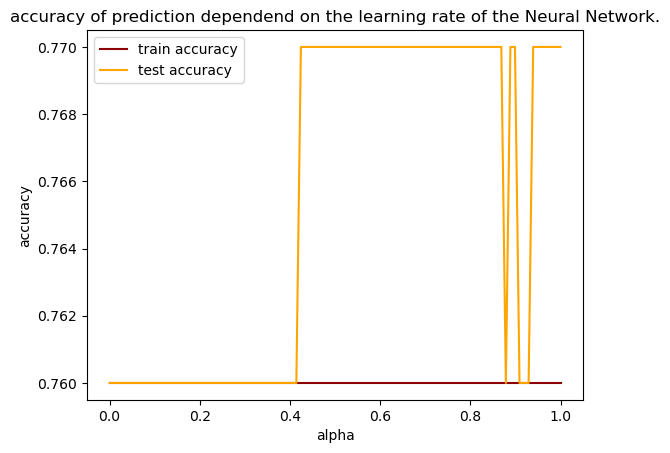

In [77]:
allTrainAccuracies = []
allTestAccuracies = []
alphas = np.linspace(1e-10, 1, 100)
for alpha in alphas:
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alpha,
                    hidden_layer_sizes=(10, 10), 
                    random_state=12,
                    max_iter=1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(alphas, allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(alphas, allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the learning rate of the Neural Network.")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-learning-rate.svg', format='svg')
plt.show()


bestPerformingAlpha = allTestAccuracies.index(max(allTestAccuracies)) 

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


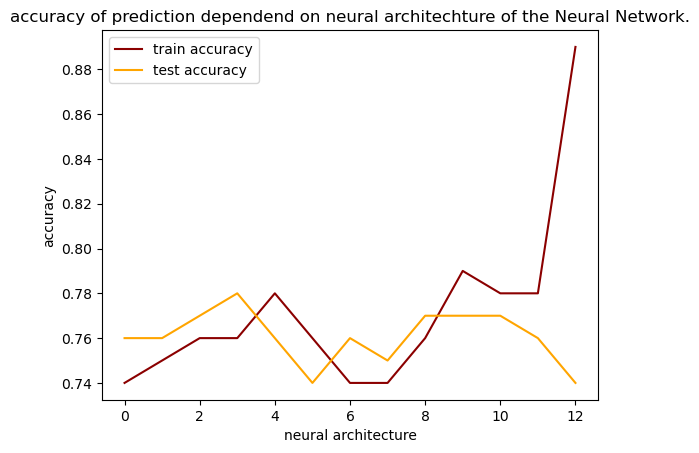

10

In [78]:
allTrainAccuracies = []
allTestAccuracies = []
hiddenLayerConfigs = [(1), (2), (5), (10), (50), (1, 1), (2, 2), (5, 5), (10, 10), (50, 50), (50, 25), (10, 10, 10), (100, 50, 25)]

for i in range(len(hiddenLayerConfigs)):
    layerConfig = hiddenLayerConfigs[i]
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= layerConfig, 
                    random_state= 12,
                    max_iter= 1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(range(len(hiddenLayerConfigs)), allTrainAccuracies, c = "darkred", label = "train accuracy")

plt.plot(range(len(hiddenLayerConfigs)), allTestAccuracies, c = "orange", label = "test accuracy")

plt.title("accuracy of prediction dependend on neural architechture of the Neural Network.")
plt.xlabel("neural architecture")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-architecture.svg', format='svg')
plt.show()


bestPerformingLayerConfig = allTestAccuracies.index(max(allTestAccuracies)) 
hiddenLayerConfigs[bestPerformingLayerConfig]

train data accuracy: 0.76
test data accuracy: 0.76


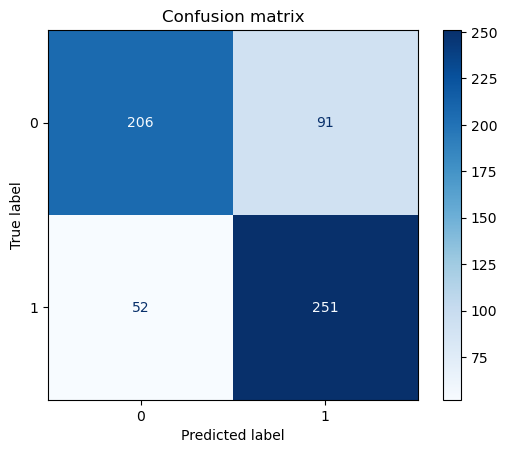

In [79]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= hiddenLayerConfigs[bestPerformingLayerConfig], 
                    random_state=9,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


y_pred_test = clf.predict(X_test)
bestAccuracyNeuralNetworks10 = clf.score(X_test, testCrit)
precisionNeuralNetworks10 = precision_score(testCrit, y_pred_test, average='binary')
recallNeuralNetworks10 = recall_score(testCrit, y_pred_test, average='binary')
F1NeuralNetworks10 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

### K-Nearest Neighbours

In [80]:
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
trainDataWithoutCrit = scaler.transform(trainDataWithoutCrit)  
testDataWithoutCrit = scaler.transform(testDataWithoutCrit)

In [81]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.64


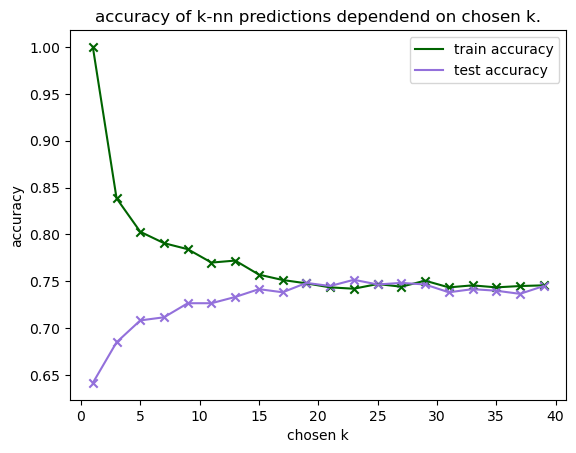

23


In [82]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 40, 2))


for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
    predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

train data accuracy: 0.74
test data accuracy: 0.75


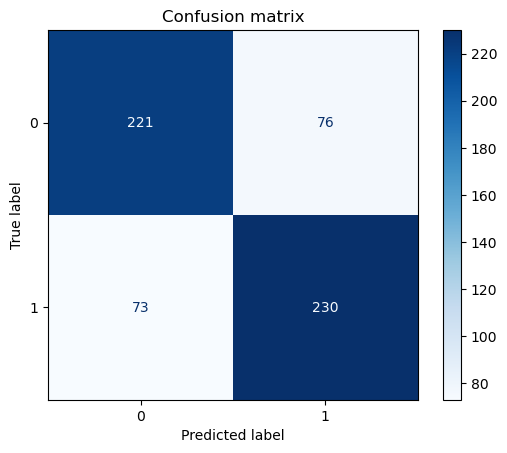

In [83]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


y_pred_test = knnClassifier.predict(testDataWithoutCrit)
bestAccuracyKnn10 = knnClassifier.score(testDataWithoutCrit, testCrit)
precisionKnn10 = precision_score(testCrit, y_pred_test, average='binary')
recallKnn10 = recall_score(testCrit, y_pred_test, average='binary')
F1Knn10 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()



# 20% missings

In [84]:
# split data into train and test subsets
train, test = train_test_split(data_20Missings, test_size = 0.3, train_size=0.7, random_state= 13)

# multiple imputation
imputer = IterativeImputer(random_state=13, max_iter=20) 
train_imputed_array = imputer.fit_transform(train)
test_imputed_array = imputer.transform(test)
train_imputed = pd.DataFrame(train_imputed_array, columns=train.columns, index=train.index)
test_imputed = pd.DataFrame(test_imputed_array, columns=test.columns, index=test.index)


# separate the predictors and the criterion variable
trainDataWithoutCrit = train_imputed.drop('Heart_Disease', axis=1)  
trainCrit = train_imputed['Heart_Disease']       

testDataWithoutCrit = test_imputed.drop('Heart_Disease', axis=1)  
testCrit = test_imputed['Heart_Disease']  

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


### Decision Tree

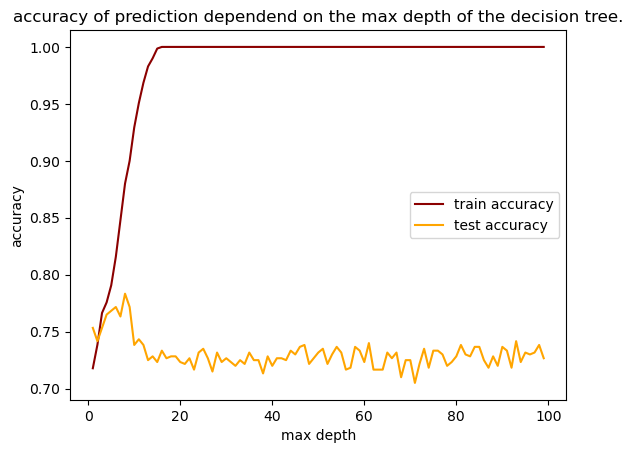

In [85]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

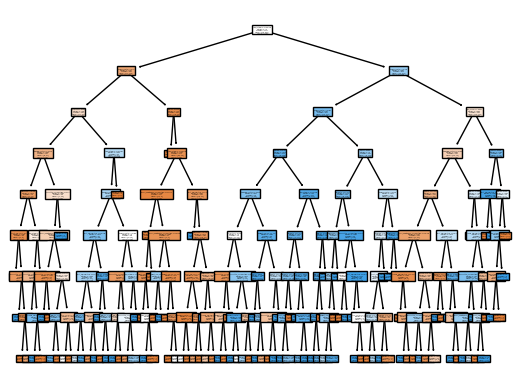

In [86]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
plt.show()

bestAccuracyTrees20 = model.score(testDataWithoutCrit, testCrit)

0.7783333333333333
0.7783333333333333
0.7817911255411255
0.7815029761904762
0.7529761904761905
0.7783333333333333
0.7777611094442778
0.7783333333333333
0.834983498349835


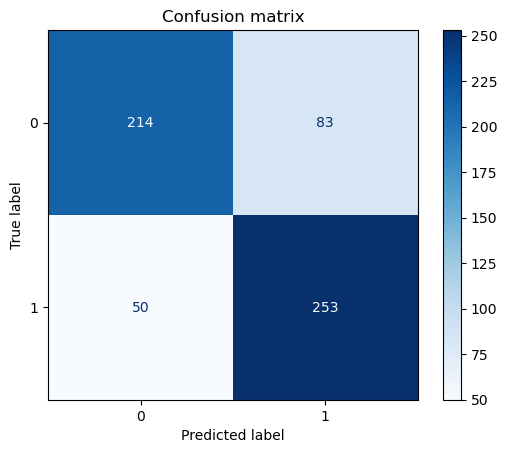

In [87]:
y_true = testCrit
y_pred_test = model.predict(testDataWithoutCrit)
bestAccuracyTrees20 = model.score(testDataWithoutCrit, testCrit)
print(bestAccuracyTrees20)
print(precision_score(y_true, y_pred_test, average='micro'))
print(precision_score(y_true, y_pred_test, average='macro'))
print(precision_score(y_true, y_pred_test, average='weighted'))

precisionTrees20 = precision_score(y_true, y_pred_test, average='binary')
print(precisionTrees20)
recallTrees20 = recall_score(testCrit, y_pred_test, average='binary')
print(recall_score(y_true, y_pred_test, average='micro'))
print(recall_score(y_true, y_pred_test, average='macro'))
print(recall_score(y_true, y_pred_test, average='weighted'))
F1Trees20 = f1_score(testCrit, y_pred_test, average='binary')

print(recallTrees20)

cm = confusion_matrix(y_true, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

### Multilayer perceptron

In [88]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [89]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=13,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")

bestAccuracyNeuralNetworks20 = clf.score(X_test, testCrit)

train data accuracy: 0.76
test data accuracy: 0.76


/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


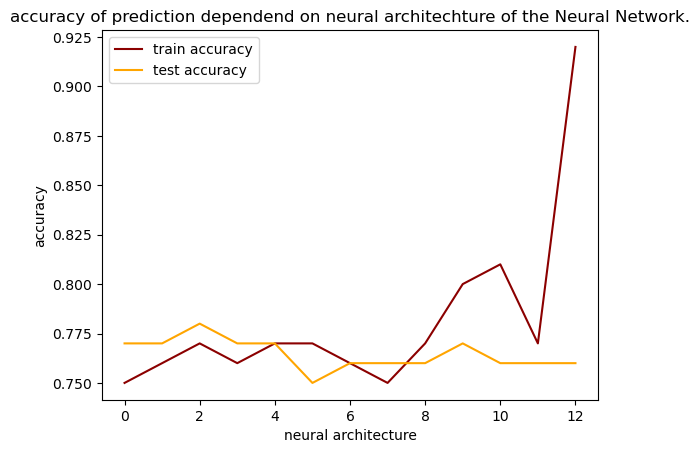

5

In [94]:
allTrainAccuracies = []
allTestAccuracies = []
hiddenLayerConfigs = [(1), (2), (5), (10), (50), (1, 1), (2, 2), (5, 5), (10, 10), (50, 50), (50, 25), (10, 10, 10), (100, 50, 25)]

for i in range(len(hiddenLayerConfigs)):
    layerConfig = hiddenLayerConfigs[i]
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha= 1e-10,
                    hidden_layer_sizes= layerConfig, 
                    random_state= 12,
                    max_iter= 1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(range(len(hiddenLayerConfigs)), allTrainAccuracies, c = "darkred", label = "train accuracy")

plt.plot(range(len(hiddenLayerConfigs)), allTestAccuracies, c = "orange", label = "test accuracy")

plt.title("accuracy of prediction dependend on neural architechture of the Neural Network.")
plt.xlabel("neural architecture")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-architecture.svg', format='svg')
plt.show()


bestPerformingLayerConfig = allTestAccuracies.index(max(allTestAccuracies)) 
hiddenLayerConfigs[bestPerformingLayerConfig]



train data accuracy: 0.76
test data accuracy: 0.77


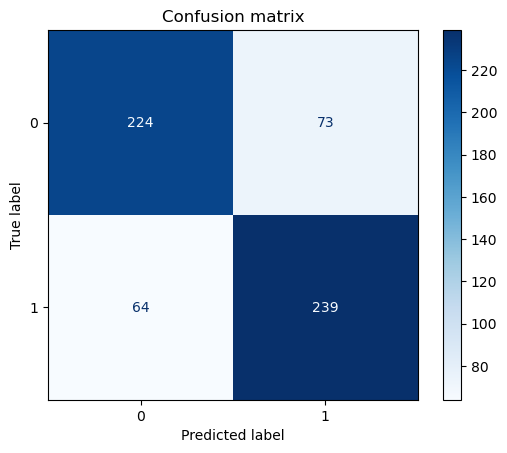

In [95]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha= 1e-10,
                    hidden_layer_sizes= hiddenLayerConfigs[bestPerformingLayerConfig], 
                    random_state=9,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


y_pred_test = clf.predict(X_test)
bestAccuracyNeuralNetworks20 = clf.score(X_test, testCrit)
precisionNeuralNetworks20 = precision_score(testCrit, y_pred_test, average='binary')
recallNeuralNetworks20 = recall_score(testCrit, y_pred_test, average='binary')
F1NeuralNetworks20 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

### K-Nearest Neighbours

In [96]:
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
trainDataWithoutCrit = scaler.transform(trainDataWithoutCrit)  
testDataWithoutCrit = scaler.transform(testDataWithoutCrit)

In [97]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.68


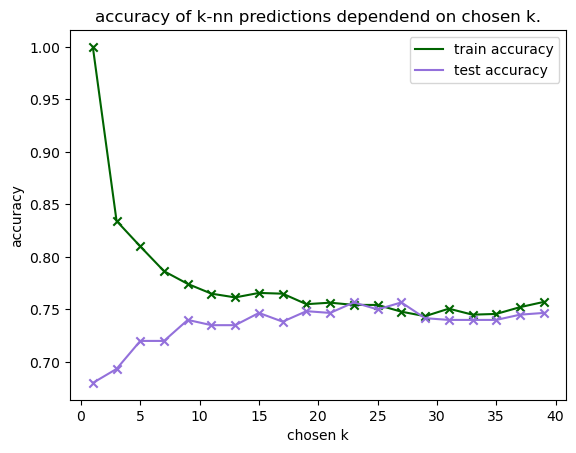

23


In [98]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 40, 2))


for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
    predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

train data accuracy: 0.75
test data accuracy: 0.76


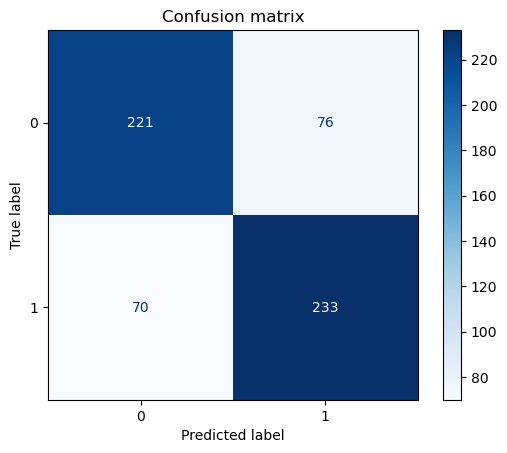

In [99]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


y_pred_test = knnClassifier.predict(testDataWithoutCrit)
bestAccuracyKnn20 = knnClassifier.score(testDataWithoutCrit, testCrit)
precisionKnn20 = precision_score(testCrit, y_pred_test, average='binary')
recallKnn20 = recall_score(testCrit, y_pred_test, average='binary')
F1Knn20 = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()



# Compare performance multiple imputation

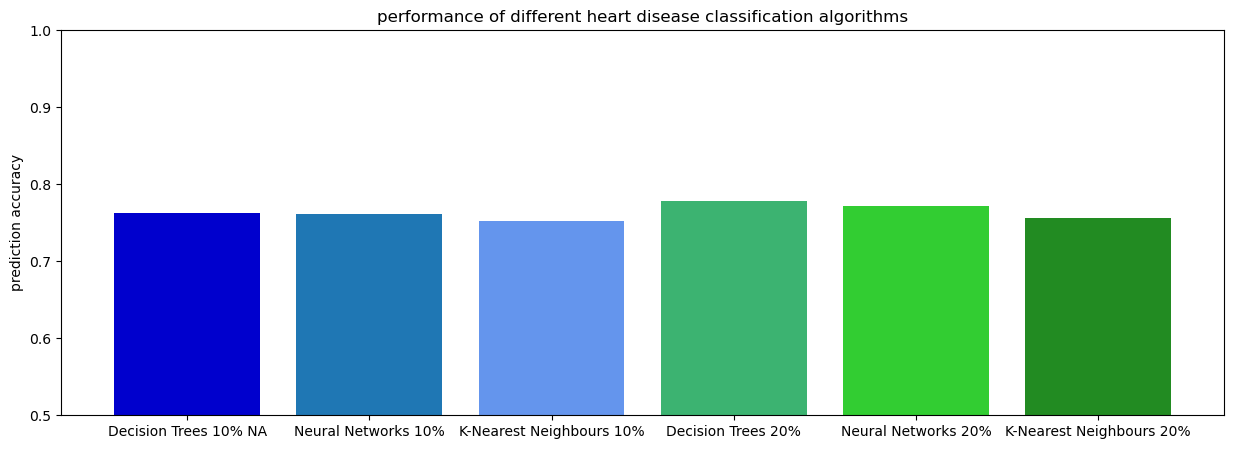

In [100]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [bestAccuracyTrees10, bestAccuracyNeuralNetworks10, bestAccuracyKnn10, bestAccuracyTrees20, bestAccuracyNeuralNetworks20, bestAccuracyKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([0.5, 1])
ax.set_ylabel("prediction accuracy")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averagePerformanceMultipleImputation = sum(allAccuracies)/len(allAccuracies)

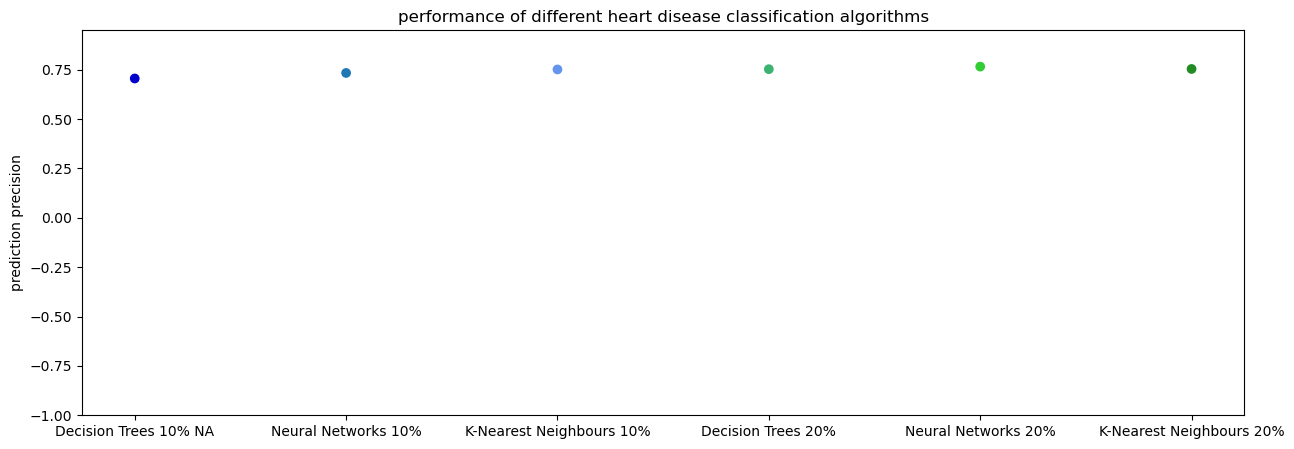

In [101]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [precisionTrees10, precisionNeuralNetworks10, precisionKnn10, precisionTrees20, precisionNeuralNetworks20, precisionKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 0.95])
ax.set_ylabel("prediction precision")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averagePrecisionMultipleImputation = sum(allAccuracies)/len(allAccuracies)

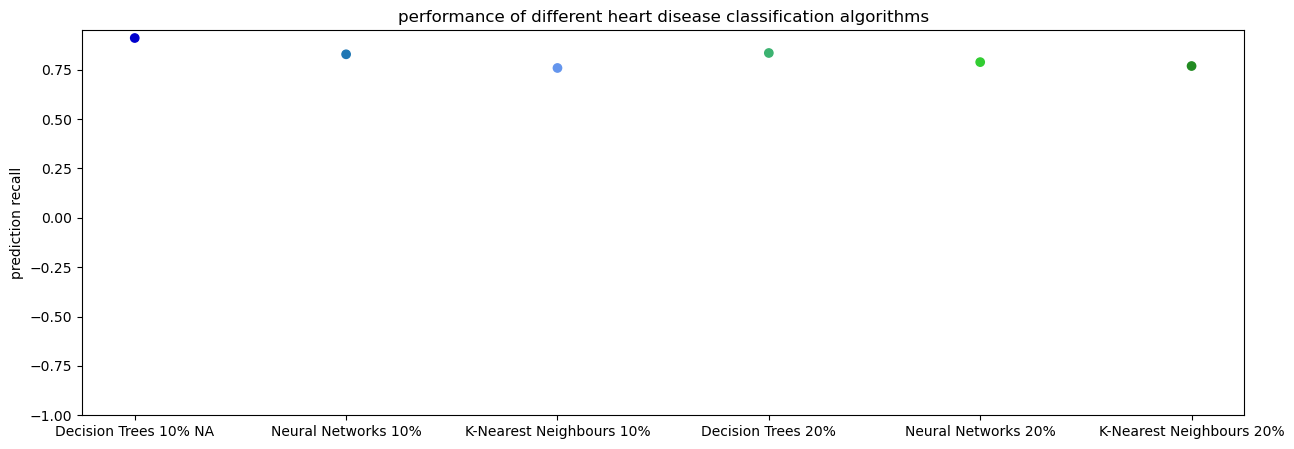

In [102]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [recallTrees10, recallNeuralNetworks10, recallKnn10, recallTrees20, recallNeuralNetworks20, recallKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 0.95])
ax.set_ylabel("prediction recall")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averagerecallMultipleImputation = sum(allAccuracies)/len(allAccuracies)

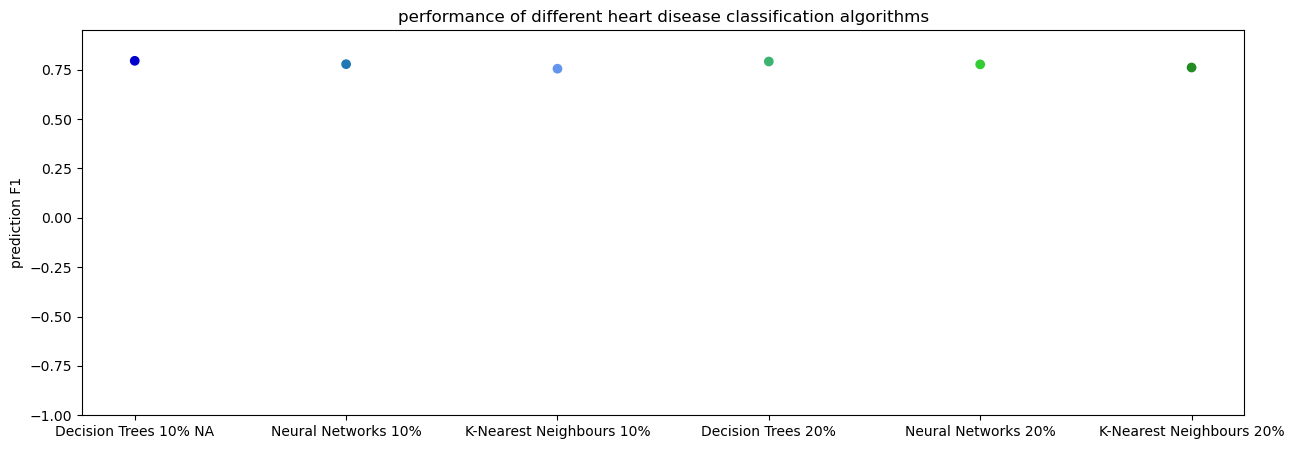

In [103]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [F1Trees10, F1NeuralNetworks10, F1Knn10, F1Trees20, F1NeuralNetworks20, F1Knn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 0.95])
ax.set_ylabel("prediction F1")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

averageF1MultipleImputation = sum(allAccuracies)/len(allAccuracies)

# Compare all NA handling techniques

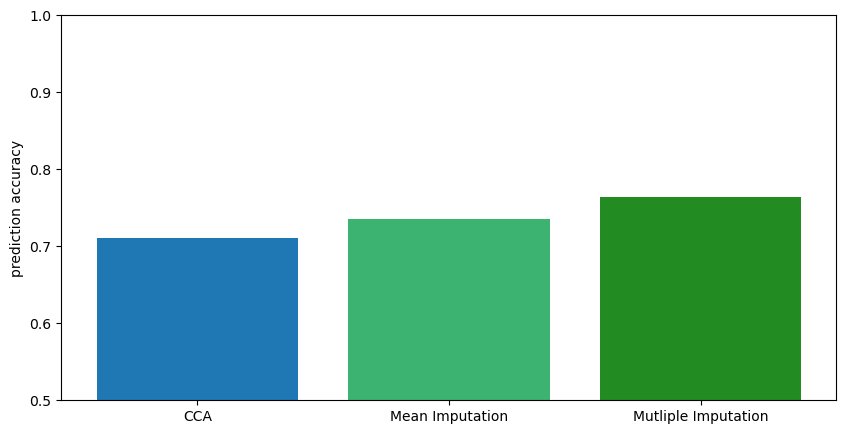

[0.7101346562721474, 0.7355555555555555, 0.7638888888888888]

In [115]:
# visualise
NAHandlingTechniquName = ("CCA", "Mean Imputation", "Mutliple Imputation")
allAccuracies = [averagePerformanceCCA,averagePerformanceMeanImputation, averagePerformanceMultipleImputation]
barColors = ['tab:blue', 'mediumseagreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(NAHandlingTechniquName, allAccuracies, color = barColors)
ax.set_ylim([0.5, 1])
ax.set_ylabel("prediction accuracy")
#ax.set_title("average prediction accuracy of different heart disease classification algorithms with three different NA handling techniques")
plt.show()

allAccuracies

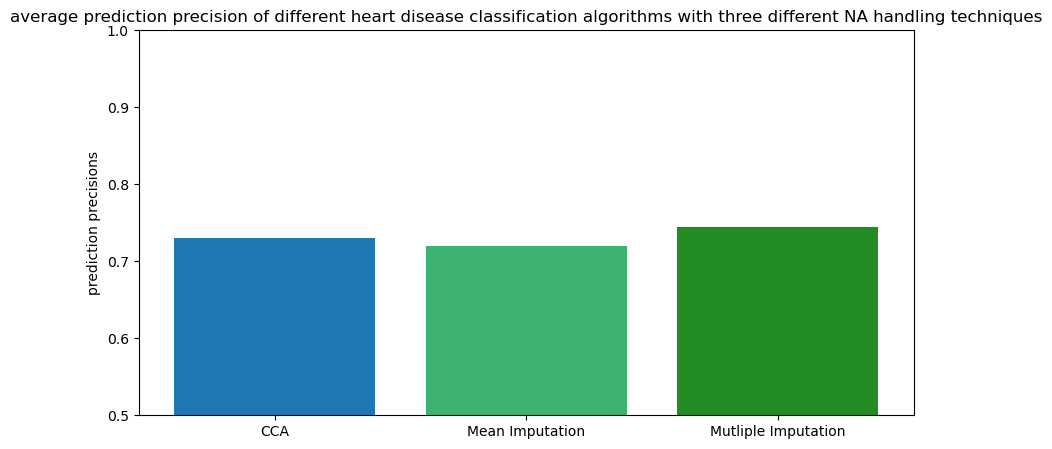

[0.7303885814524113, 0.7204830896219172, 0.7440802679115749]

In [113]:
# visualise
NAHandlingTechniquName = ("CCA", "Mean Imputation", "Mutliple Imputation")
allAccuracies = [averagePrecisionCCA,averagePrecisionMeanImputation, averagePrecisionMultipleImputation]
barColors = ['tab:blue', 'mediumseagreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(NAHandlingTechniquName, allAccuracies, color = barColors)
ax.set_ylim([0.5, 1])
ax.set_ylabel("prediction precisions")
ax.set_title("average prediction precision of different heart disease classification algorithms with three different NA handling techniques")
plt.show()

allAccuracies

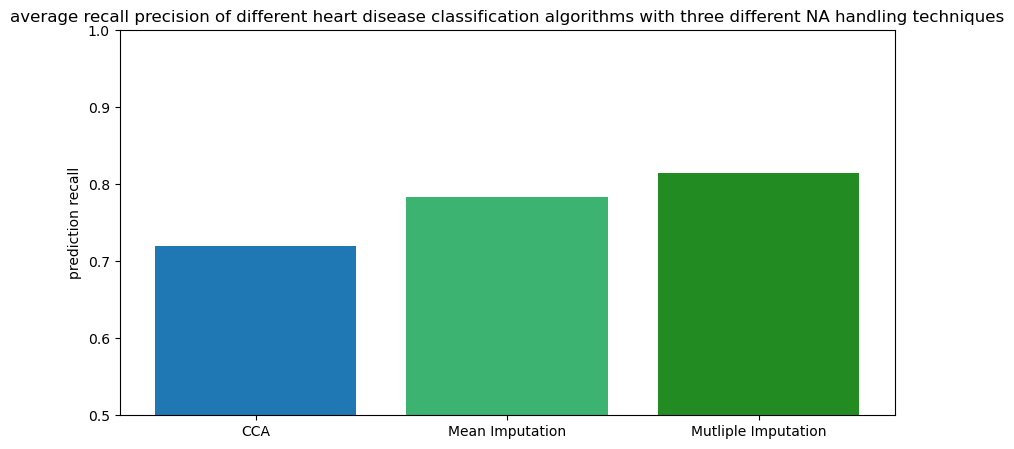

[0.720108695652174, 0.7832783278327833, 0.8151815181518152]

In [112]:
# visualise
NAHandlingTechniquName = ("CCA", "Mean Imputation", "Mutliple Imputation")
allAccuracies = [averagerecallCCA,averagerecallMeanImputation, averagerecallMultipleImputation]
barColors = ['tab:blue', 'mediumseagreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(NAHandlingTechniquName, allAccuracies, color = barColors)
ax.set_ylim([0.5, 1])
ax.set_ylabel("prediction recall")
ax.set_title("average recall precision of different heart disease classification algorithms with three different NA handling techniques")
plt.show()

allAccuracies

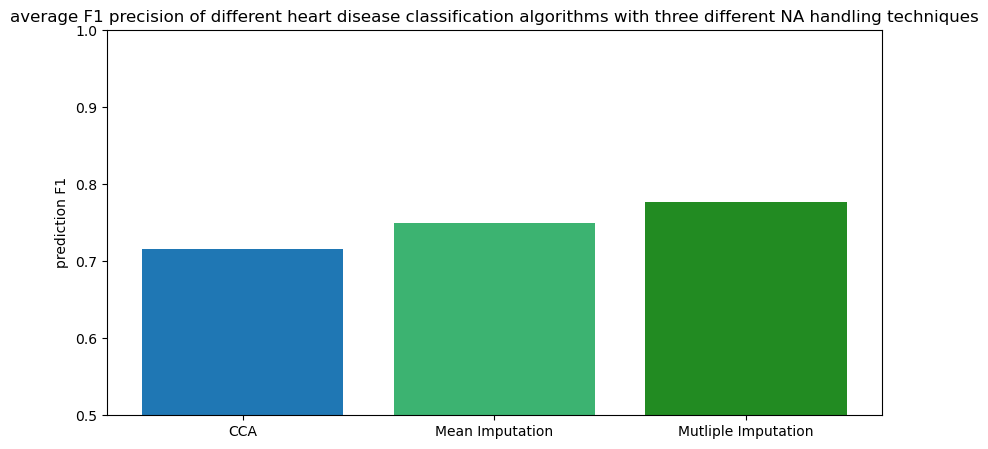

[0.7165427629107978, 0.7495631092710666, 0.7765927009524725]

In [111]:
# visualise
NAHandlingTechniquName = ("CCA", "Mean Imputation", "Mutliple Imputation")
allAccuracies = [averageF1CCA,averageF1MeanImputation, averageF1MultipleImputation]
barColors = ['tab:blue', 'mediumseagreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(NAHandlingTechniquName, allAccuracies, color = barColors)
ax.set_ylim([0.5, 1])
ax.set_ylabel("prediction F1")
ax.set_title("average F1 precision of different heart disease classification algorithms with three different NA handling techniques")
plt.show()

allAccuracies